In [1]:
# %% libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime, time
from scipy.stats import skew

In [2]:
# %%
folder = os.getcwd()
data = os.path.join(folder, 'data')

# Data Loading

In [3]:
# %% Data Loading
for root, files, files in os.walk(data):
    csv_files = {}
    for file in files:
        if "csv" in file:
            file_path = os.path.join(root, file)
            read_file = pd.read_csv(file_path)
            csv_files[file] = read_file
            
# print(csv_files.keys())
# ------------------------------------------------- #
# 'carInsurance_test.csv', 'carInsurance_train.csv' #
# ------------------------------------------------- #

X_train = csv_files['carInsurance_train.csv']
X_test = csv_files['carInsurance_test.csv']

# Data Inspection

In [4]:
# it seems to have several missing data
print("\n# ----- Inspecting DataFrame overall information ----- #")
print(X_train.info())

# Findings:
# 1. There are several data type object -> need to do some data convert
# 2. There are several missing data. 
#    *'Outcome' are very severe


# ----- Inspecting DataFrame overall information ----- #
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  Ca

### Checking label with NaN values

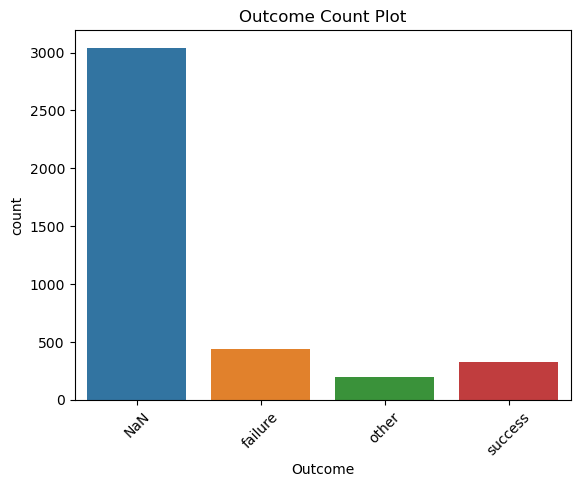

In [5]:
def countplot_with_nan(data_series):
    sns.countplot(x=data_series.fillna("NaN"))
    plt.title(f"{data_series.name} Count Plot")
    plt.xticks(rotation=45)
    plt.show()
    
countplot_with_nan(X_train['Outcome'])

# after reading the data explaination, outcome is the of previous marketing.
# which consists of [nan 'failure' 'other' 'success'].

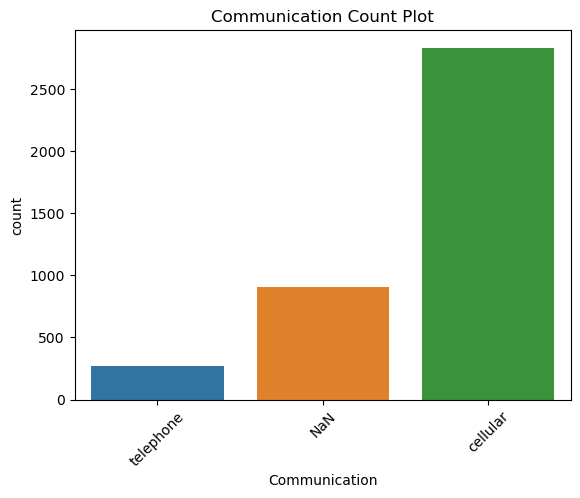

In [6]:
countplot_with_nan(X_train.Communication)

# only indicate either person can be contacted or not
# might need more statistical analysis with the target

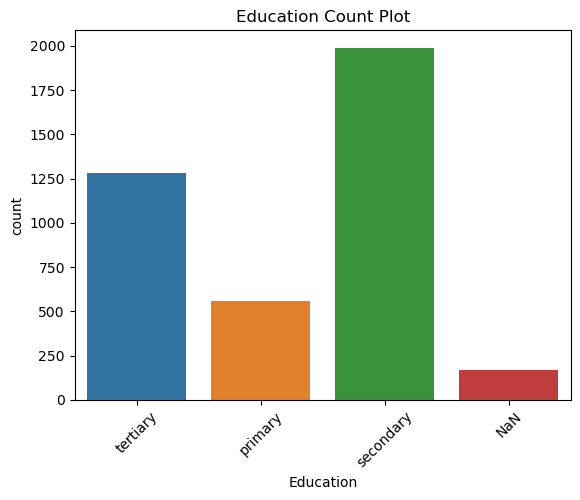

In [7]:
countplot_with_nan(X_train.Education)

# based on my experiences, the educations do affect the tendency going for
# insurance, but lets try to prove it later

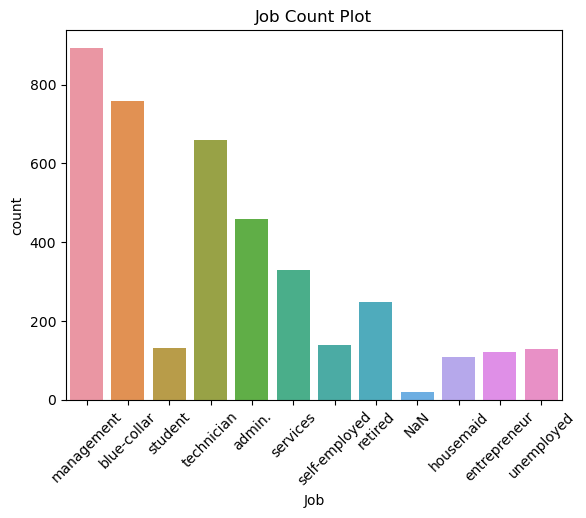

In [8]:
countplot_with_nan(X_train.Job)

# this is a very challenging to replace the missing data, but for now lets
# drop all the missing values

### Check label without NaN values

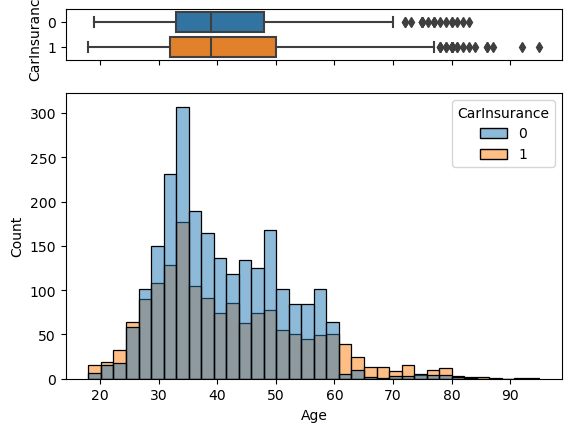

In [9]:
def boxHistplot(df, col, target=None):
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    if target:
        # assigning a graph to each ax
        sns.boxplot(data=df, x=col, y=target, orient="h", ax=ax_box)
        sns.histplot(data=df, x=col, ax=ax_hist, hue=target)

        # Remove x axis name for the boxplot
        ax_box.set(xlabel='')
        plt.show()
    
    else:
        # assigning a graph to each ax
        sns.boxplot(data=df, x=col, orient="h", ax=ax_box)
        sns.histplot(data=df, x=col, ax=ax_hist)

        # Remove x axis name for the boxplot
        ax_box.set(xlabel='')
        plt.show()
    
boxHistplot(X_train, 'Age', 'CarInsurance')

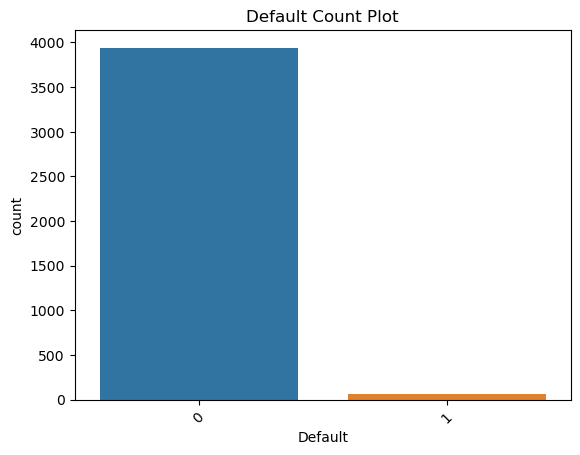

In [10]:
countplot_with_nan(X_train.Default)

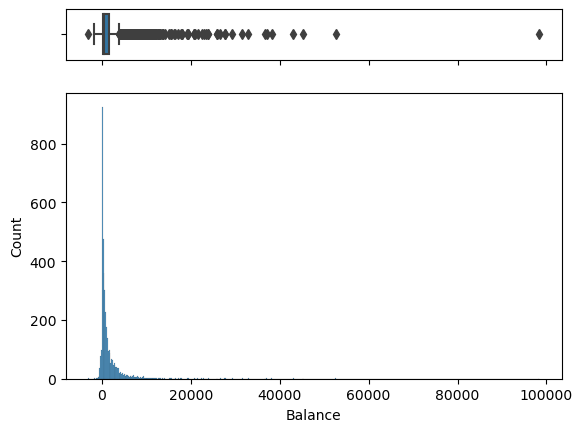

In [11]:
boxHistplot(X_train, 'Balance')

# very skewed

In [12]:
skew(X_train.Balance)

# very highly positive skew

9.874190554264814

In [13]:
X_train['Balance'].describe()

count     4000.000000
mean      1532.937250
std       3511.452489
min      -3058.000000
25%        111.000000
50%        551.500000
75%       1619.000000
max      98417.000000
Name: Balance, dtype: float64

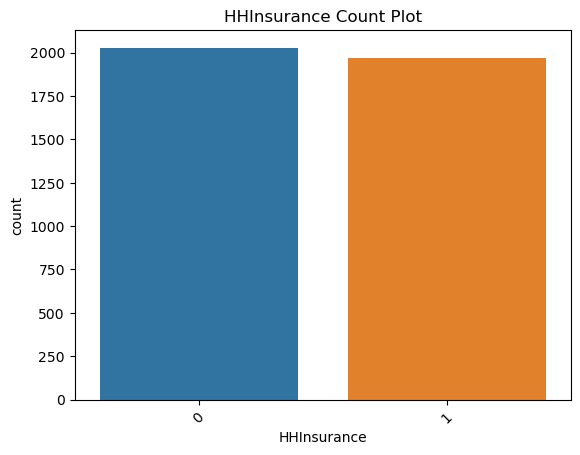

In [14]:
countplot_with_nan(X_train.HHInsurance)

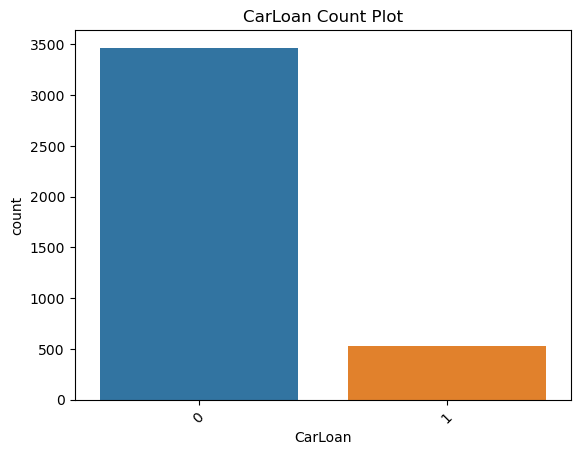

In [15]:
countplot_with_nan(X_train.CarLoan)

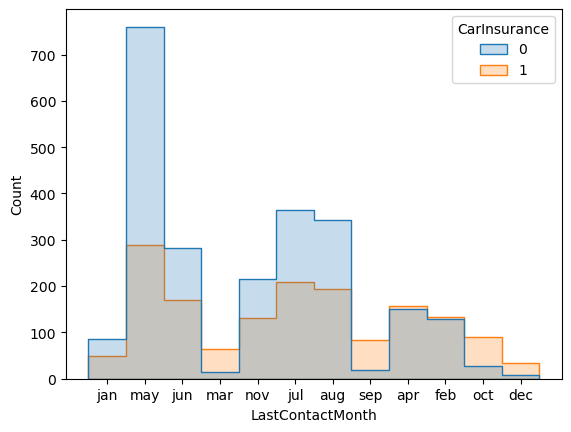

In [16]:
sns.histplot(data=X_train, x='LastContactMonth', hue='CarInsurance', element='step')
plt.show()

In [17]:
# Mapping of month abbreviations to numbers
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

# object to number
X_train['LastContactMonth'] = X_train['LastContactMonth'].apply(lambda x: month_mapping[x.lower()])

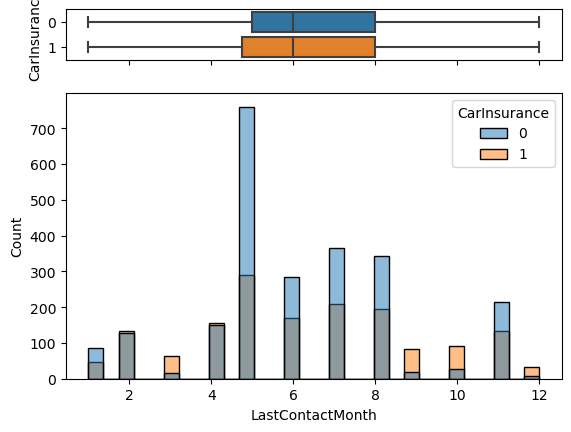

In [18]:
boxHistplot(X_train, 'LastContactMonth', 'CarInsurance')

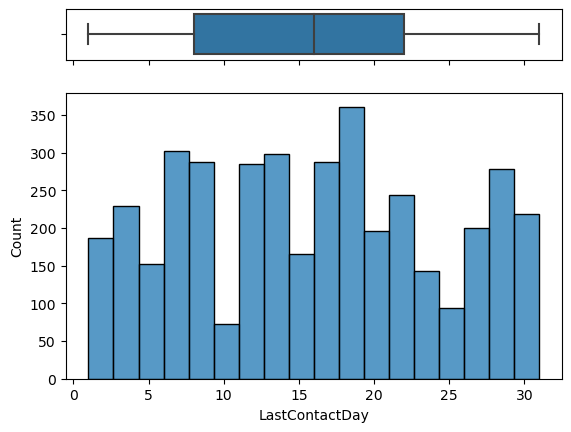

In [19]:
boxHistplot(X_train, 'LastContactDay')

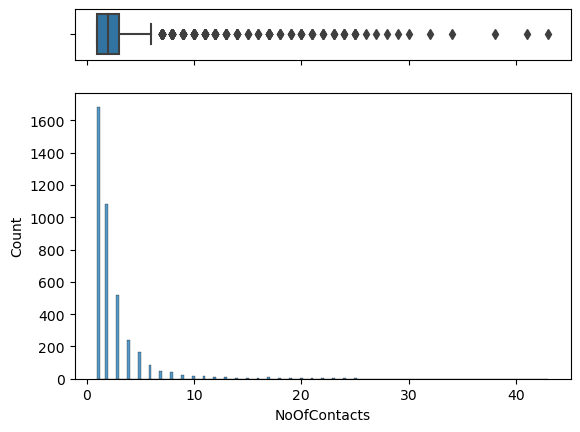

In [20]:
boxHistplot(X_train, 'NoOfContacts')

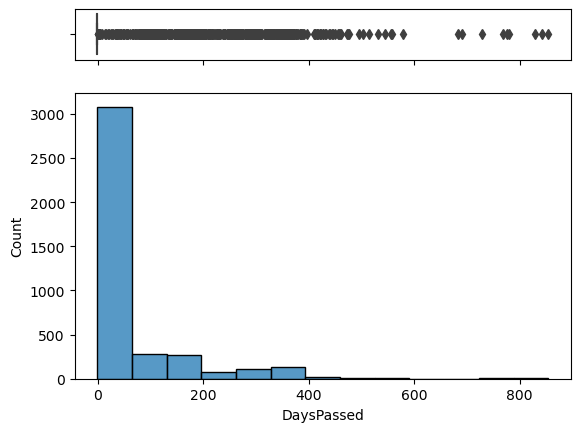

In [21]:
boxHistplot(X_train, 'DaysPassed')

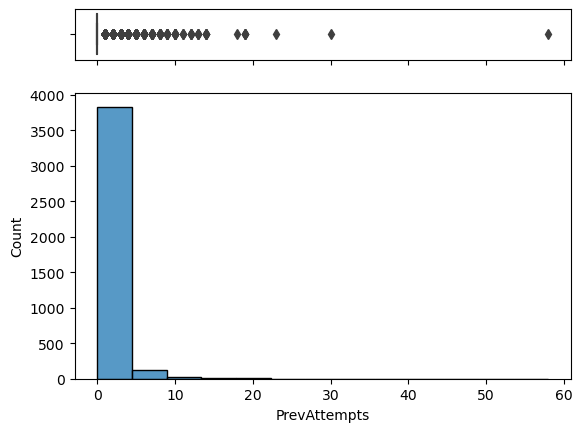

In [22]:
boxHistplot(X_train, 'PrevAttempts')

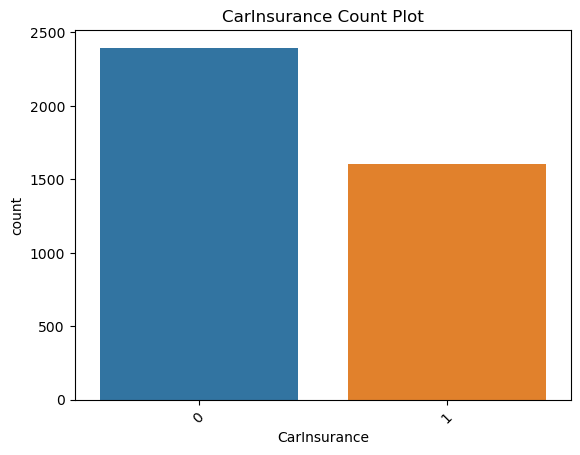

In [23]:
countplot_with_nan(X_train.CarInsurance)

# slightly imbalance

In [24]:
# ----------------------------------- #
# checking on 'Call' columns #
# ----------------------------------- #
print("\n# ----- Inspecting 'Call' ----- #")
print(X_train[['CallStart', 'CallEnd']])

# i think its better to create a new column CallDuration
# also mark the session for the call start


# ----- Inspecting 'Call' ----- #
     CallStart   CallEnd
0     13:45:20  13:46:30
1     14:49:03  14:52:08
2     16:30:24  16:36:04
3     12:06:43  12:20:22
4     14:35:44  14:38:56
...        ...       ...
3995  17:46:28  17:50:57
3996  14:49:16  14:51:21
3997  12:19:03  12:23:53
3998  11:27:35  11:29:14
3999  13:31:48  13:36:22

[4000 rows x 2 columns]


# Preprocessing

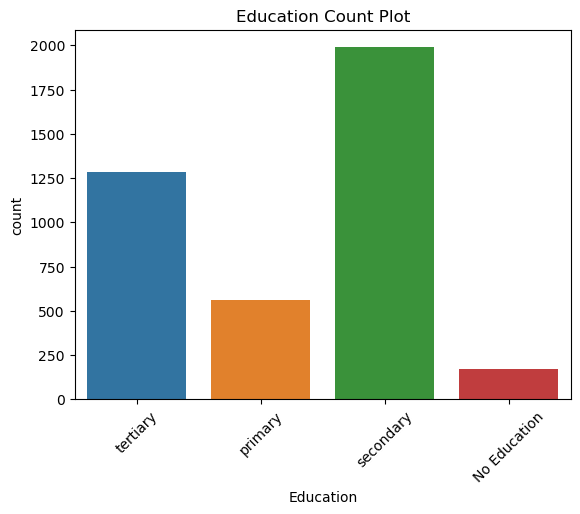

In [25]:
# Education columns
X_train['Education'].fillna('No Education', inplace=True)
countplot_with_nan(X_train.Education)

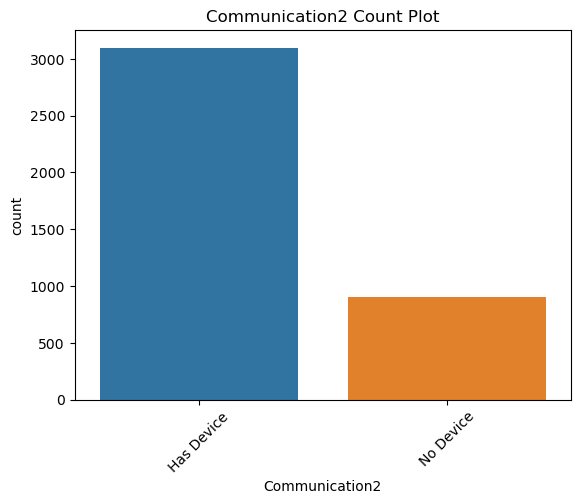

In [26]:
# Communication
X_train['Communication'].fillna('No Device', inplace=True)
X_train['Communication2'] = X_train['Communication'].apply(lambda x: 'No Device' if x =='No Device' else 'Has Device')
countplot_with_nan(X_train.Communication2)

In [27]:
# creating 'Call Duration'
# Convert 'CallStart' and 'CallEnd' columns to datetime objects
X_train['CallStart'] = pd.to_datetime(X_train['CallStart'], format='%H:%M:%S')
X_train['CallEnd'] = pd.to_datetime(X_train['CallEnd'], format='%H:%M:%S')

# Calculate call duration and create a new column 'CallDuration'
X_train['CallDuration'] = X_train['CallEnd'] - X_train['CallStart']
X_train['CallDuration'] = X_train['CallDuration'].dt.total_seconds()

In [28]:
# Function to categorize time
def categorize_time(call_time):
    # Define time ranges
    morning_start = time(0, 0, 0)
    morning_end = time(11, 59, 59)

    afternoon_start = time(12, 0, 0)
    afternoon_end = time(17, 59, 59)

    night_start = time(18, 0, 0)
    night_end = time(23, 59, 59)

    call_time = call_time.time()  # Extract time from timestamp
    if morning_start <= call_time <= morning_end:
        return 'Morning'
    elif afternoon_start <= call_time <= afternoon_end:
        return 'Afternoon'
    elif night_start <= call_time <= night_end:
        return 'Night'
    
# Apply the function to create a new column
X_train['CallPeriod'] = X_train['CallStart'].apply(categorize_time)

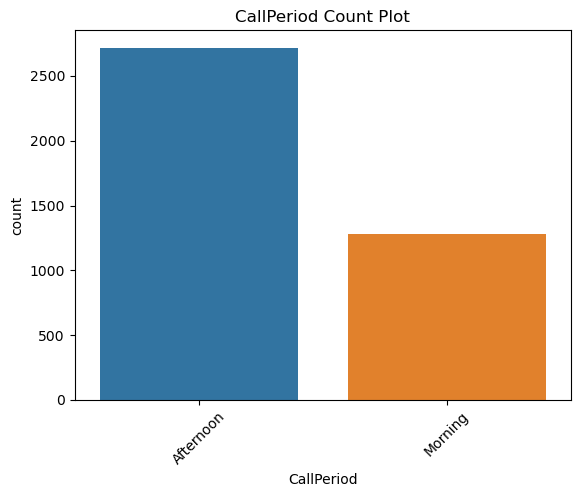

In [29]:
countplot_with_nan(X_train.CallPeriod)

### Future Plans:
1. Create a pipeline to clean some of the data
2. Skew data need to be normalize? Lets check the correlation beforehands